In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Polygon
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import xarray as xr
import scienceplots


In [2]:
plt.rc('font', family='Arial')
plt.rcParams['axes.labelpad'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['ytick.major.pad'] = 15

In [3]:
colors = np.array([
    [255, 255, 255], [181, 201, 255], [99, 112, 247], [0, 99, 255],
    [0, 150, 150], [0, 198, 51], [99, 255, 0], [198, 255, 51],
    [255, 255, 0], [255, 198, 0], [255, 124, 0], [255, 25, 0]
]) / 255.0
cmap = ListedColormap(colors)

In [4]:
files = [
    './Global_NCAR_ALB_ROOF_0.5.nc',
    './Global_FIT_ALB_ROOF_0.5.nc'
]
titles = [
    '(a) Roof albedo of urban density scheme',
    '(b) Roof albedo of fitting method',
]
boundaries1 = [0, 0.01, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.20]
boundaries2 = [0, 0.01, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.20]
norm1 = BoundaryNorm(boundaries1, ncolors=cmap.N, clip=True)
norm2 = BoundaryNorm(boundaries2, ncolors=cmap.N, clip=True)

box_data = []

/stu01/dongwz/miniconda3/envs/pyplot/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/stu01/dongwz/miniconda3/envs/pyplot/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


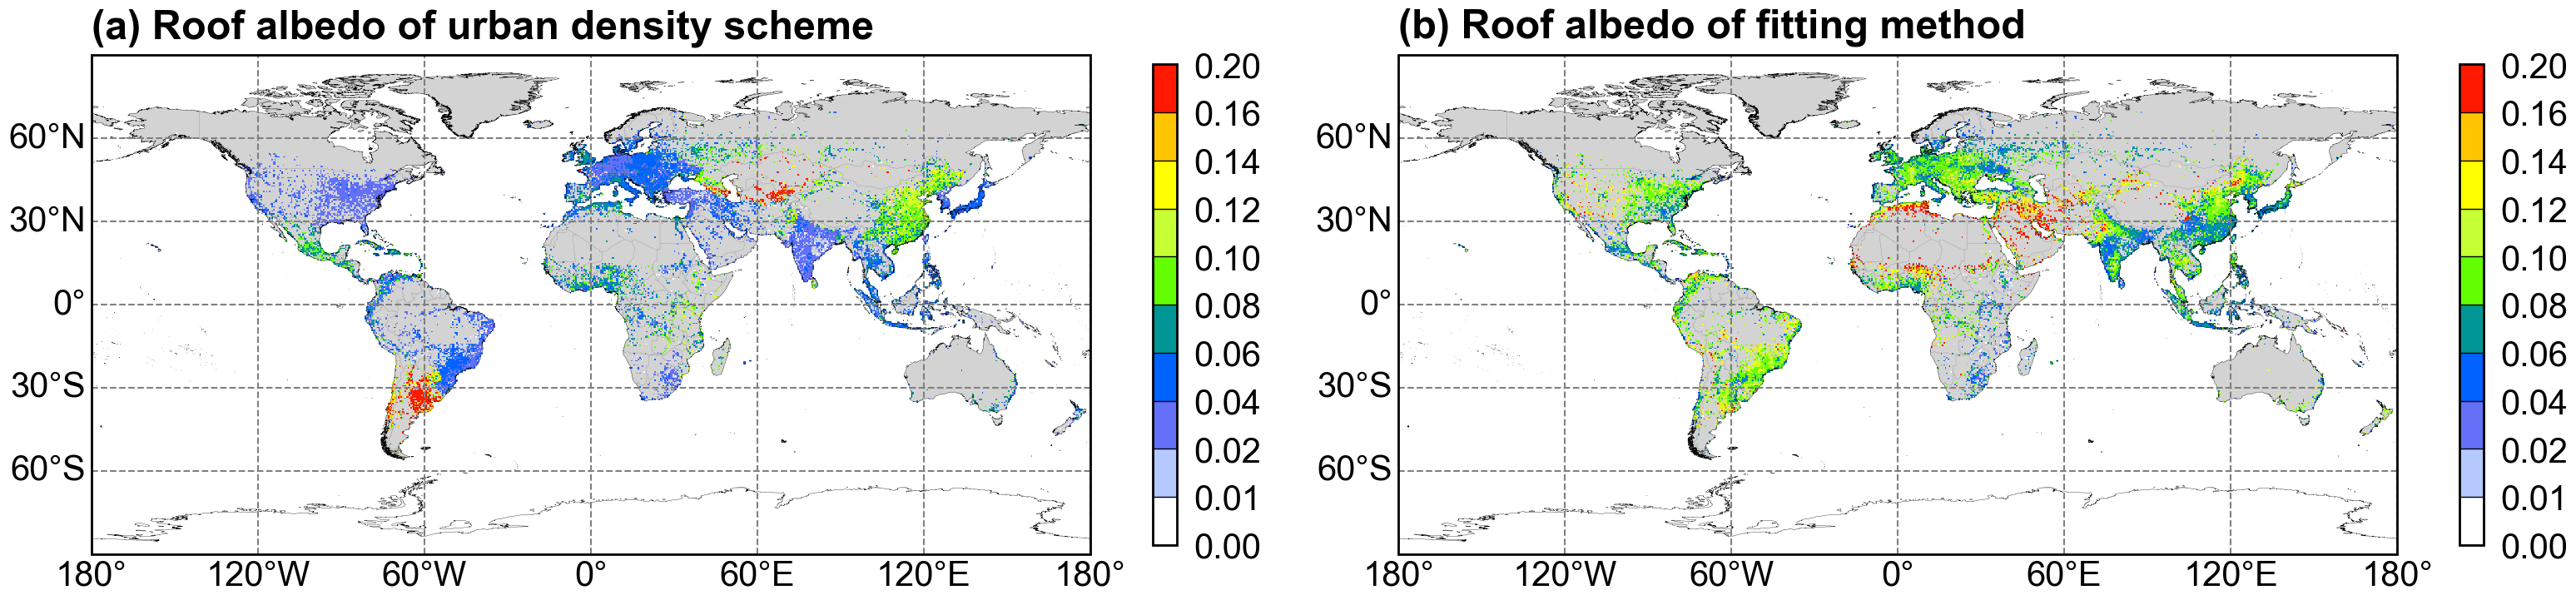

In [9]:
projection = ccrs.PlateCarree()
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': projection}, figsize=(32, 8))

for i, fpath in enumerate(files):
    ds = xr.open_dataset(fpath)
    var = ds['ALB_ROOF']
    data_flat = var.values.flatten()
    box_data.append(data_flat[~np.isnan(data_flat)])

    # ax = axs[i//2, i%2]
    ax = axs[i%2]
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.25)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=0.2, color='gray')
    antarctic = Polygon([(-180, -90),(180, -90),(180, -66.33),(-180, -66.33)],
                        facecolor='white', transform=ccrs.PlateCarree())
    ax.add_patch(antarctic)
    gl = ax.gridlines(crs=projection, draw_labels=True,
                      linewidth=1.5, color='gray', linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 30}
    gl.ylabel_style = {'size': 30}

    if i==0:
        im = ax.pcolormesh(var['lon'], var['lat'], var,
                       cmap=cmap, norm=norm2, shading='auto',
                       transform=ccrs.PlateCarree())
        ax.set_title(titles[i], fontsize=35, loc='left', weight='bold')
        im = ax.pcolormesh(var['lon'], var['lat'], var,
                       cmap=cmap, norm=norm2, shading='auto',
                       transform=ccrs.PlateCarree())
        ax.set_title(titles[i], fontsize=35, loc='left', weight='bold')
        cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05,
                        aspect=20, ticks=boundaries2, shrink=0.75)
        cbar.ax.tick_params(labelsize=30, direction='in', width=1, length=21)
    if i==1:
        im = ax.pcolormesh(var['lon'], var['lat'], var,
                       cmap=cmap, norm=norm2, shading='auto',
                       transform=ccrs.PlateCarree())
        ax.set_title(titles[i], fontsize=35, loc='left', weight='bold')
        im = ax.pcolormesh(var['lon'], var['lat'], var,
                       cmap=cmap, norm=norm2, shading='auto',
                       transform=ccrs.PlateCarree())
        ax.set_title(titles[i], fontsize=35, loc='left', weight='bold')

        cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05,
                        aspect=20, ticks=boundaries2, shrink=0.75)
        cbar.ax.tick_params(labelsize=30, direction='in', width=1, length=21)
    cbar.outline.set_linewidth(2)
    for spine in ax.spines.values():
        spine.set_linewidth(2)

plt.tight_layout()
plt.savefig('Figure5.jpg', dpi=300)
plt.show()